In [1]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas

%matplotlib widget

input = "/Users/austin/Downloads/bloaty.csv"
data = pandas.read_csv(input, low_memory=False)
data['time'] = data['time'] / 1000 / 60 / 60

Plot all figures on one.

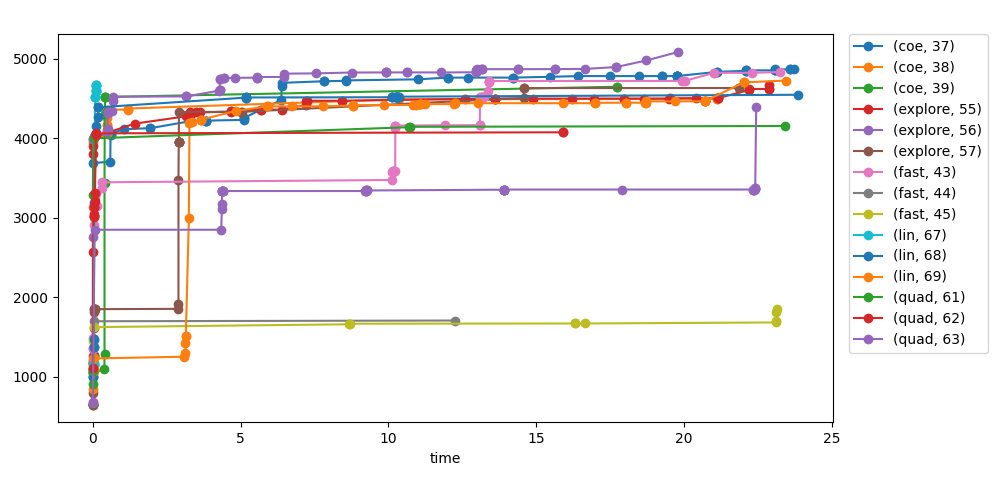

In [2]:
plt.close("all")
fig, ax = plt.subplots()
fig: Figure
fig.set_size_inches((10,5))
fig.set_dpi(300)

for key, grp in data.groupby(['power_schedule', 'run_id']):
    ax = grp.plot(ax=ax, kind='line', marker='o', x='time', y='coverage', label=key)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# set aspect ratio to 1
ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right - x_left) / (y_low - y_high)) * ratio)

plt.tight_layout()
plt.show()

Plots grouped by power schedule.

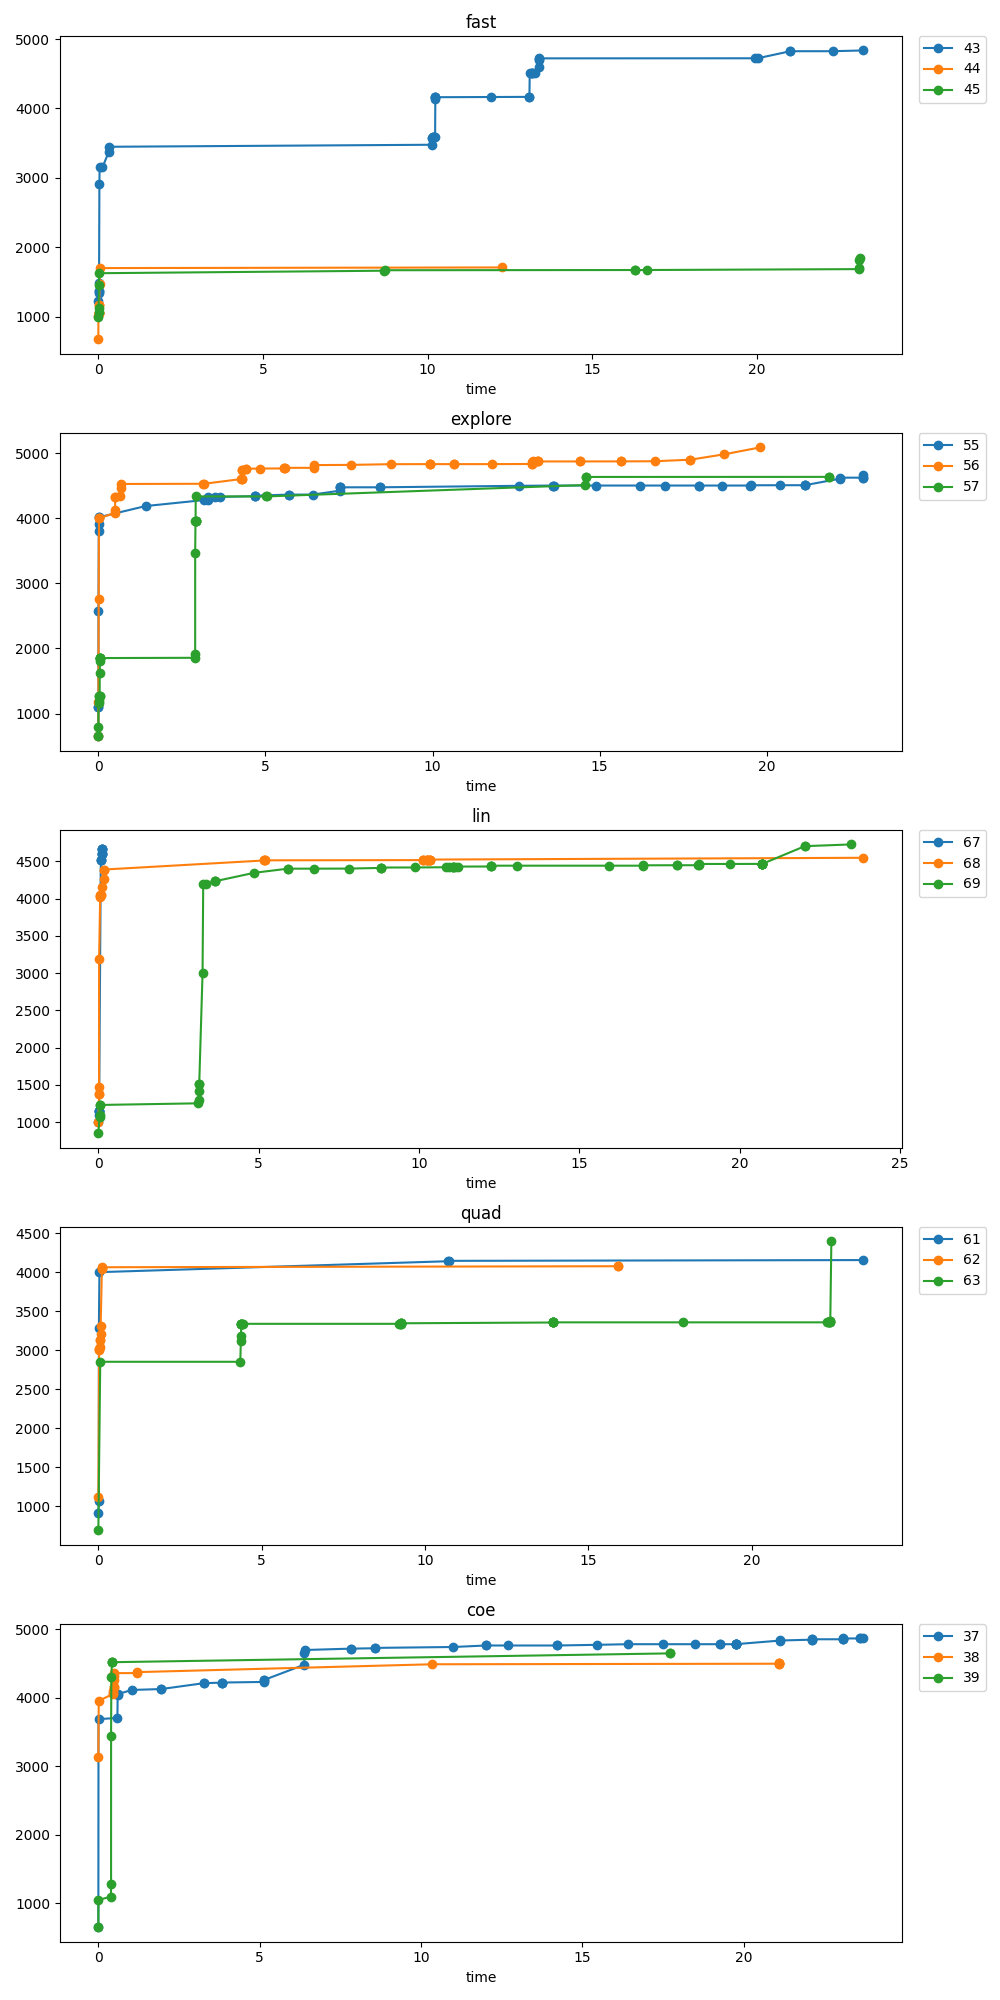

In [3]:
plt.close("all")
fig, axs = plt.subplots(nrows=len(data['power_schedule'].unique()))
fig: Figure
fig.set_size_inches((10,20))
fig.set_dpi(300)

for i, ps in enumerate(data['power_schedule'].unique()):
    subdata = data[data['power_schedule'] == ps]
    ax = axs[i]
    for key, grp in subdata.groupby(['run_id']):  
        ax = grp.plot(ax=ax, kind='line', marker='o', x='time', y='coverage', label=key)
        ax.set_title(ps)
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

        
fig.tight_layout()

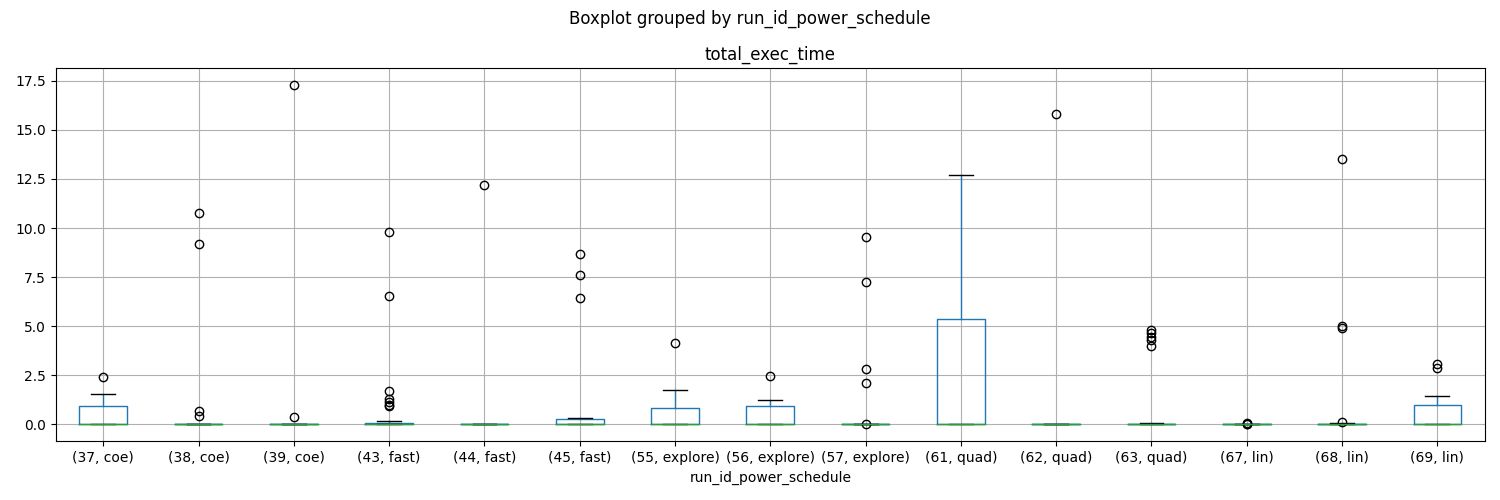

In [4]:
plt.close("all")
data.sort_values(["run_id", "power_schedule", "time"])
data['total_exec_time'] = data['time'] - data['time'].shift(1)
data['total_exec_time'] = data['total_exec_time'].clip(lower=0).fillna(0)

# Create tuple column
num_rows = len(data['power_schedule'].unique())
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
fig.set_dpi(300)

data['run_id_power_schedule'] = data[['run_id', 'power_schedule']].apply(tuple, axis=1)
data.boxplot(column='total_exec_time', by='run_id_power_schedule', ax=ax)

fig.tight_layout()
plt.show()